#  Delivery_time -> Predict delivery time using sorting time 

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# import dataset
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# #EDA and Data Visualization


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dataset.shape

(21, 2)

In [6]:
dataset.dtypes # identify the datatypes of the features

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
dataset.shape # identify the size of of the dataset

(21, 2)

In [8]:
dataset.isnull().values.any() # checking if dataset has empty cells

False

In [9]:
userspecific = dict(boxes = 'DarkGreen', whiskers = 'DarkOrange', medians = 'DarkBlue', caps = 'Gray')

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

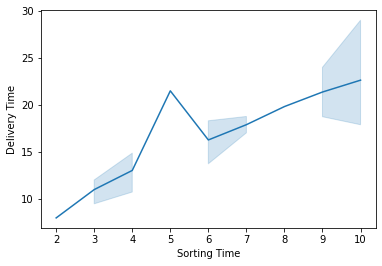

In [10]:
sns.lineplot(data=dataset, x="Sorting Time", y="Delivery Time")

C:\Users\chand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

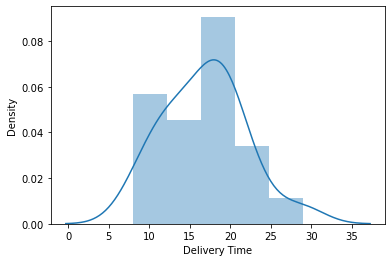

In [11]:
sns.distplot(dataset['Delivery Time'])

C:\Users\chand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

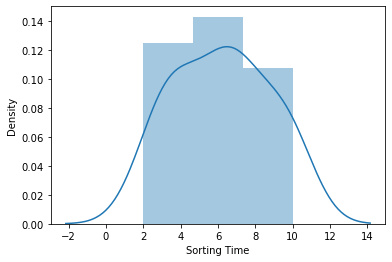

In [12]:
sns.distplot(dataset['Sorting Time'])

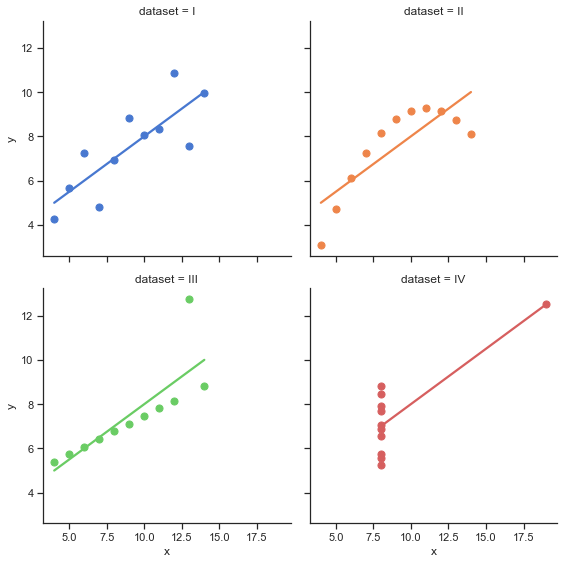

In [13]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
dataset = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=dataset,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# coloumn renaiming 

In [14]:
dataset=dataset.rename({'Delivery Time':'x', 'Sorting Time':'y'} ,axis=1)
dataset

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [15]:
dataset.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


# Model building

In [16]:
dataset.corr()


,x,y
x,1.000000,0.816366
y,0.816366,1.000000


In [17]:
#load library
import statsmodels.formula.api as smf

######  Weighted Least Squares

In [18]:
model=smf.wls ("x~y",data=dataset).fit()

In [39]:
model.cov_type ,model.aic , model.conf_int , model.model

('nonrobust',
 181.86947816161256,
 <bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C26747FE80>>,
 <statsmodels.regression.linear_model.WLS at 0x1c2676051c0>)

In [20]:
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.666
Model:                            WLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     83.92
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           1.44e-11
Time:                        17:15:29   Log-Likelihood:                -88.935
No. Observations:                  44   AIC:                             181.9
Df Residuals:                      42   BIC:                             185.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9991      1.127     -0.886      0.3

In [21]:
# Finding Coefficient parameters
model.params

Intercept   -0.999080
y            1.333089
dtype: float64

In [22]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept   -0.886256
 y            9.160764
 dtype: float64,
 Intercept    3.805259e-01
 y            1.436505e-11
 dtype: float64)

######  Generalized least squares

In [23]:
model2=smf.gls

In [24]:
model2=smf.gls("x~y",data=dataset).fit()

In [25]:
print(model2.summary())

                            GLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.666
Model:                            GLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     83.92
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           1.44e-11
Time:                        17:15:30   Log-Likelihood:                -88.935
No. Observations:                  44   AIC:                             181.9
Df Residuals:                      42   BIC:                             185.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9991      1.127     -0.886      0.3

In [26]:
# Finding tvalues and pvalues
model2.tvalues , model2.pvalues

(Intercept   -0.886256
 y            9.160764
 dtype: float64,
 Intercept    3.805259e-01
 y            1.436505e-11
 dtype: float64)

In [27]:
# Finding Coefficient parameters
model.params

Intercept   -0.999080
y            1.333089
dtype: float64

###### Ordinary Least Squares

In [28]:
model3=smf.ols

In [29]:
model3=smf.ols("x~y",data=dataset).fit()

In [30]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     83.92
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           1.44e-11
Time:                        17:15:31   Log-Likelihood:                -88.935
No. Observations:                  44   AIC:                             181.9
Df Residuals:                      42   BIC:                             185.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9991      1.127     -0.886      0.3

In [31]:
# Finding Coefficient parameters
model3.params

Intercept   -0.999080
y            1.333089
dtype: float64

In [32]:
# Finding tvalues and pvalues
model3.tvalues , model3.pvalues

(Intercept   -0.886256
 y            9.160764
 dtype: float64,
 Intercept    3.805259e-01
 y            1.436505e-11
 dtype: float64)

In [33]:
# Finding Rsquared Values
model3.rsquared , model3.rsquared_adj

(0.6664538423204793, 0.6585122671376336)

In [34]:
model3.scale

3.4942930804521213

# Model Predictions

In [35]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [36]:
# Automatic Predicti4n for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [37]:
data_pred=pd.DataFrame(new_data,columns=['y'])
data_pred

,y
0,5
1,8


In [38]:
model.predict(data_pred)

0    5.666367
1    9.665636
dtype: float64